In [4]:
import os
import cv2
import numpy as np
from utils.tool import render_camera

In [10]:
from IPython.display import display
from PIL import Image

def show_render_check(image_name, cur_dt, data_root, use_jpg=False):
    cam = np.array(cur_dt['camera'])
    r_img = render_camera(cam)
    h, w = r_img.shape[:2]
    if use_jpg: image_name = image_name.replace('png', 'jpg')
    a_img = cv2.imread(os.path.join(data_root, 'align_images', image_name))
    a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2RGB)
    a_img = cv2.resize(a_img, (h, w))
    vis_img = np.hstack([r_img, a_img])
    display(Image.fromarray(vis_img))

In [6]:
# get all json files
data_root = '/data/PanoHeadData/multi_view'
json_files = sorted([i for i in os.listdir(data_root) if i.endswith('.json')])
print(json_files)

['dataset.json']


In [7]:
import json
import tqdm
merged_data = {}
for idx in tqdm.tqdm(range(len(json_files))):
    json_file = json_files[idx]
    with open(os.path.join(data_root, json_file), 'r') as f:
        data = json.load(f)
        merged_data.update(data)
print(len(merged_data))

100%|██████████| 1/1 [00:07<00:00,  7.21s/it]

273567


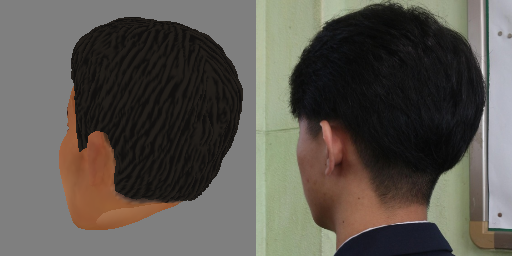

In [12]:

for image_name, image_meta in merged_data.items():
    show_render_check(image_name, image_meta, data_root, use_jpg=True)
    break
    # if 'camera' in image_meta:
    #     show_render_check(image_meta, data_root)
    #     break